In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split


data_dir = '/content/drive/MyDrive/tomatoes_classficnts.v1i.multiclass/train'
labels_dir = '/content/drive/MyDrive/tomatoes_classficnts.v1i.multiclass/train/_classes.csv'
image_dir = os.path.join(data_dir, "images")
labels_dir = os.path.join(labels_dir)


In [ ]:

labels_df = pd.read_csv(labels_dir)
labels_df.columns = labels_df.columns.str.strip()

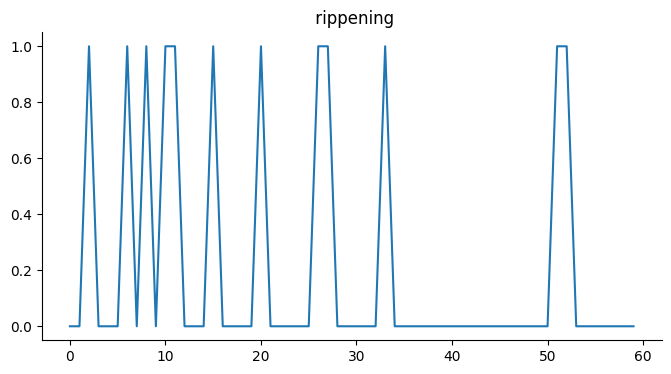

In [ ]:
# @title  rippening

from matplotlib import pyplot as plt
labels_df['rippening'].plot(kind='line', figsize=(8, 4), title=' rippening')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
def display_image(image_path):
  imag = Image.open(image_path)
  plt.imshow(imag)
  plt.axis('off')
  plt.show()



Label: vegetable_png.rf.10e45eac373af8d6a6a7cbaac736ab6c.jpg


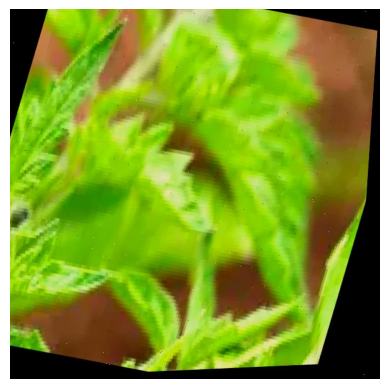

Label: germination_png.rf.464e0d681f7fe6298dc27ec9bfc778d4.jpg


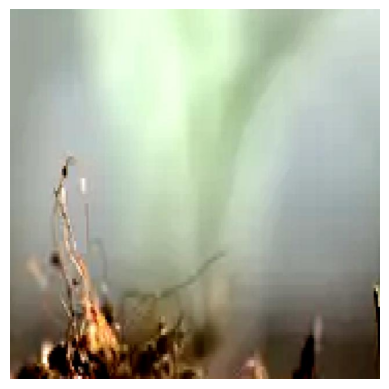

Label: rippening_png.rf.1a4f4937ce16828459cf6d9be4ecf0bb.jpg


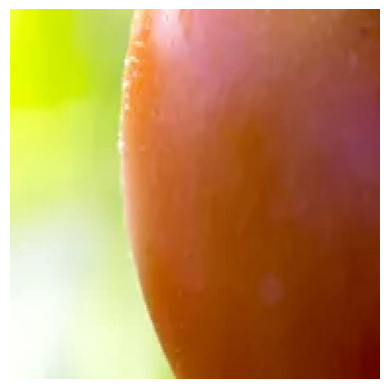

Label: fruit-formation_png.rf.3ef5834f05b4f02fb7aa4af1aa116e91.jpg


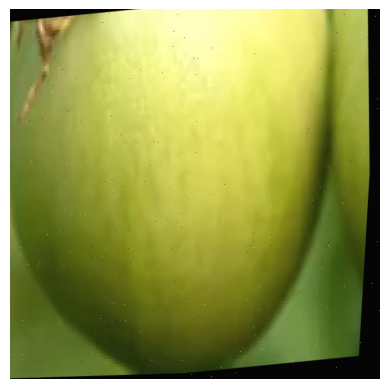

Label: fruit-formation_png.rf.51ae6f06a0e409b8aadbf5fa36049501.jpg


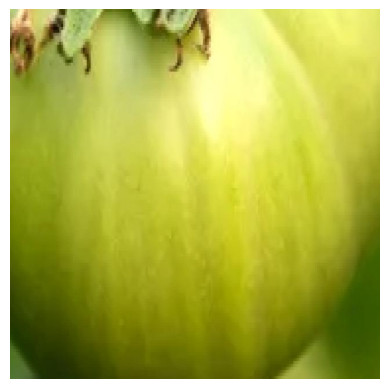

Label: vegetable_png.rf.0b6377cb75839510278063ebb61f81ca.jpg


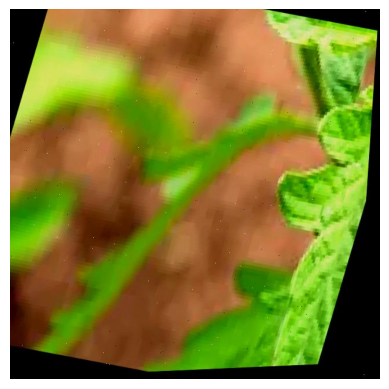

Label: rippening_png.rf.1e1410436dd358a9fa132f4412969f40.jpg


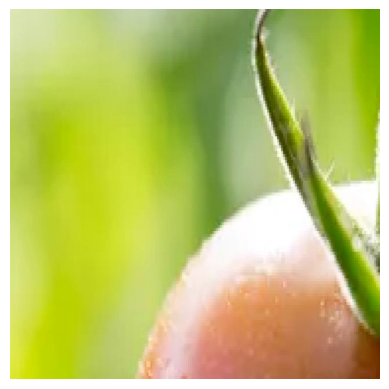

Label: early-stage_png.rf.4eb8d43590011cbe931f9a958409dee5.jpg


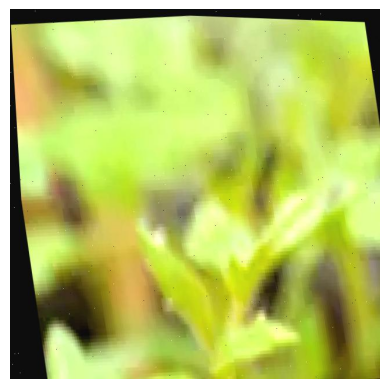

Label: rippening_png.rf.20e52572c1cb3ec42e9757f1f1204b00.jpg


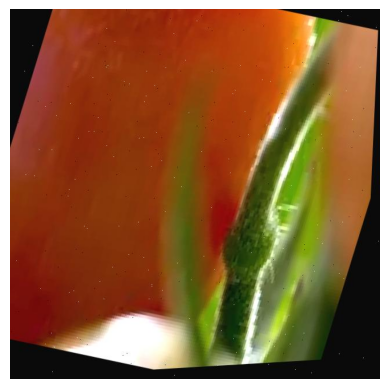

Label: fruit-formation_png.rf.21a756b91f531aad2a9fcbdb8f1df00c.jpg


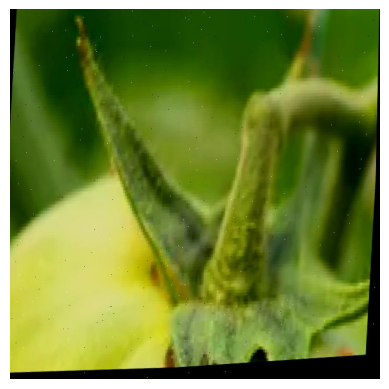

In [ ]:
for index, row in labels_df.iterrows():
  if index >= 10:
    break
  image_path = os.path.join(image_dir, row['filename'])
  print(f"Label: {row['filename']}")
  display_image(image_path)

In [ ]:
def load_and_resize(img_path, target_size=(128, 128)):
  img = Image.open(img_path)
  img = img.resize(target_size)
  print(f"THE RESIZED IMAGES {img}")
  img = np.array(img)
  if img.shape[-1] == 4:
    img = img[..., :3]
  img = img/255.0
  return img

In [ ]:
print("Column names in the labels DataFrame:", labels_df.columns)

Column names in the labels DataFrame: Index(['filename', 'early stage', 'flowering', 'fruit formation',
       'germination', 'pollination', 'rippening', 'vegetable'],
      dtype='object')


In [ ]:
X = []
y = []
target_size = (128, 128)

for index, row in labels_df.iterrows():
  img_path = os.path.join(image_dir, row['filename'])
  img = load_and_resize(img_path, target_size=target_size)
  X.append(img)

  label = row[['early stage', 'flowering', 'fruit formation',
       'germination', 'pollination', 'rippening', 'vegetable']]
  y.append(label)

X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

THE RESIZED IMAGES <PIL.Image.Image image mode=RGB size=128x128 at 0x7E81955A6D10>
THE RESIZED IMAGES <PIL.Image.Image image mode=RGB size=128x128 at 0x7E81952252D0>
THE RESIZED IMAGES <PIL.Image.Image image mode=RGB size=128x128 at 0x7E81955A6D10>
THE RESIZED IMAGES <PIL.Image.Image image mode=RGB size=128x128 at 0x7E8195BF33D0>
THE RESIZED IMAGES <PIL.Image.Image image mode=RGB size=128x128 at 0x7E81955A6D10>
THE RESIZED IMAGES <PIL.Image.Image image mode=RGB size=128x128 at 0x7E8195BF33D0>
THE RESIZED IMAGES <PIL.Image.Image image mode=RGB size=128x128 at 0x7E8195741E40>
THE RESIZED IMAGES <PIL.Image.Image image mode=RGB size=128x128 at 0x7E8195BF33D0>
THE RESIZED IMAGES <PIL.Image.Image image mode=RGB size=128x128 at 0x7E8195741E40>
THE RESIZED IMAGES <PIL.Image.Image image mode=RGB size=128x128 at 0x7E81954AAD70>
THE RESIZED IMAGES <PIL.Image.Image image mode=RGB size=128x128 at 0x7E8195741E40>
THE RESIZED IMAGES <PIL.Image.Image image mode=RGB size=128x128 at 0x7E818C177BE0>
THE 

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42 )

In [ ]:
#Define a simple CNN model

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu", input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation= "relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(7, activation="sigmoid"),
    ])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'],
              )

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
2/2 [==============================] - 3s 845ms/step - loss: 0.6159 - accuracy: 0.2292 - val_loss: 0.4098 - val_accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 1s 554ms/step - loss: 0.3768 - accuracy: 0.2500 - val_loss: 0.4042 - val_accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 2s 585ms/step - loss: 0.3258 - accuracy: 0.4167 - val_loss: 0.3248 - val_accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 2s 623ms/step - loss: 0.2527 - accuracy: 0.6667 - val_loss: 0.2201 - val_accuracy: 0.9167
Epoch 5/20
2/2 [==============================] - 2s 581ms/step - loss: 0.2048 - accuracy: 0.7708 - val_loss: 0.2350 - val_accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 2s 929ms/step - loss: 0.1643 - accuracy: 0.8542 - val_loss: 0.2608 - val_accuracy: 0.5000
Epoch 7/20
2/2 [==============================] - 2s 923ms/step - loss: 0.1343 - accuracy: 0.8958 - val_loss: 0.2150 - val_accuracy: 0.5833
Epoch 8/20
2

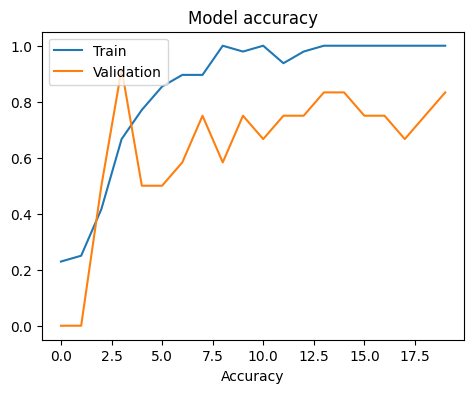

In [ ]:
#ploting training and validation accuracy values
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.legend(['Train', 'Validation'], loc ='upper left')

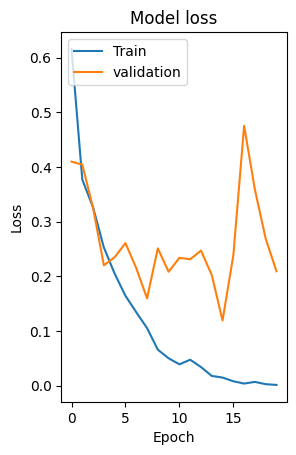

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [ ]:
def load_and_resize_for_predictions(img_path, target_size=(128, 128)):
  img = Image.open(img_path)
  img = img.resize(target_size)
  print(f"THE RESIZED IMAGES {img}")
  img = np.array(img)
  if img.shape[-1] == 4:
    img = img[..., :3]
  img = img/255.0
  img = np.expand_dims(img, axis=0)
  return img

THE RESIZED IMAGES <PIL.Image.Image image mode=RGB size=128x128 at 0x7E818C1CAF80>
1/1 [==============================] - 0s 95ms/step
predictions [1.5965515e-01 4.4470665e-15 1.2423083e-01 2.9133515e-10 3.7911149e-16
 1.8032709e-10 6.3729006e-01]
predict_labels [1 0 1 0 0 0 1]
Predicted growth stages: {'early stage': True, 'flowering': False, 'fruit formation': True, 'germination': False, 'pollination': False, 'rippening': False, 'vegetable': True}


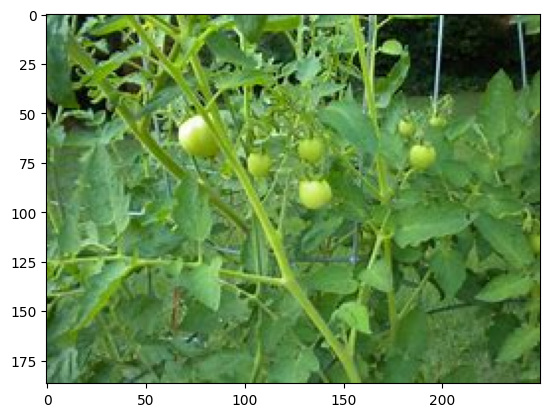

In [ ]:
img_dir ='/content/drive/MyDrive/tomatoes_classficnts.v1i.multiclass/OIP (2).jpg'
growth_stage = ['early stage', 'flowering', 'fruit formation','germination', 'pollination', 'rippening', 'vegetable']


def predict_growth_stage(model, imag_path):
  img = load_and_resize_for_predictions(imag_path)
  predictions = model.predict(img)

  print("predictions", predictions[0])

  threshold = 0.1
  predict_labels = (predictions[0] > threshold).astype(int)
  print("predict_labels", predict_labels)

  result = {growth_stage[i]: bool(predict_labels[i]) for i in range(len(growth_stage))}
  image = Image.open(imag_path)
  plt.imshow(image)
  return result

result = predict_growth_stage(model, img_dir)

print("Predicted growth stages:", result)


